<a href="https://colab.research.google.com/github/irenedini/learning-fastai/blob/main/face_center.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 4.5MB/s 
     |████████████████████████████████| 1.0MB 13.0MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 194kB 29.3MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 40kB 6.9MB/s 
     |████████████████████████████████| 92kB 10.9MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 2.6MB 30.1MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision import *

In [ ]:
path = untar_data(URLs.BIWI_HEAD_POSE)

In [ ]:
(path/'01').ls()

(#1000) [Path('/root/.fastai/data/biwi_head_pose/01/frame_00384_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00437_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00268_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00191_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00192_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00454_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00400_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00032_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00433_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00157_pose.txt')...]

In [ ]:
images = get_image_files(path)

In [ ]:
str(images[0])[:-7]+'pose.txt'

'/root/.fastai/data/biwi_head_pose/11/frame_00437_pose.txt'

In [ ]:
def image_to_pose(image_path):
    return Path(str(image_path)[:-7]+'pose.txt')

In [ ]:
image_to_pose(images[0])

Path('/root/.fastai/data/biwi_head_pose/11/frame_00437_pose.txt')

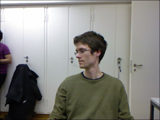

In [ ]:
image_0 = PILImage.create(images[0])
image_0.to_thumb(160)

In [ ]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)

def get_ctr(f):
    ctr = np.genfromtxt(image_to_pose(f), skip_header=3)
    c1 = ctr[0] * cal[0][0]/ctr[2] + cal[0][2]
    c2 = ctr[1] * cal[1][1]/ctr[2] + cal[1][2]
    return tensor([c1, c2])

In [ ]:
get_ctr(images[0])

tensor([341.0537, 213.9402])

In [ ]:
db = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_ctr,
    splitter=FuncSplitter(lambda r: r.parent.name=='13'),
    batch_tfms=[*aug_transforms(size=(240,320)), 
                Normalize.from_stats(*imagenet_stats)]
)

In [ ]:
dls = db.dataloaders(path)

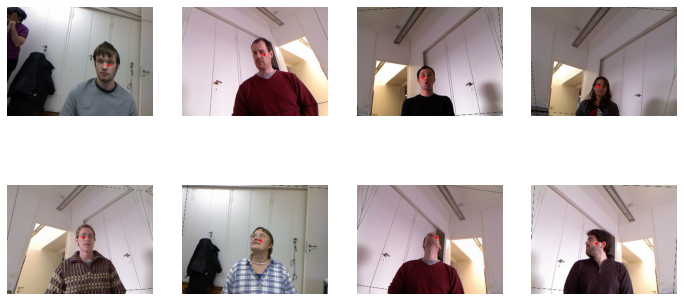

In [ ]:
dls.show_batch(nrows=2, ncols=4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


SuggestedLRs(lr_min=0.006918309628963471, lr_steep=7.585775847473997e-07)

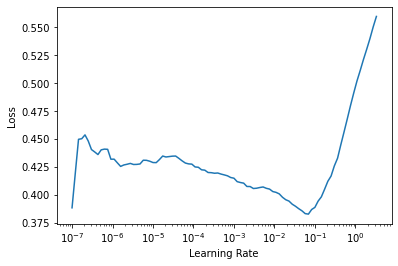

In [ ]:
learner = cnn_learner(dls, resnet34, y_range=(-1,1))
learner.lr_find()

In [ ]:
learner.fit_one_cycle(5, 3e-2)

epoch,train_loss,valid_loss,time
0,0.043048,0.029035,02:21
1,0.003974,0.000420,02:20
2,0.002630,0.000355,02:20
3,0.001947,0.000279,02:21
4,0.001355,0.000078,02:22


In [ ]:
learner_2 = cnn_learner(dls, resnet34, y_range=(-1,1))
learner_2.fine_tune(4, freeze_epochs=2)

epoch,train_loss,valid_loss,time
0,0.254819,0.075461,02:24
1,0.026947,0.003140,02:23


epoch,train_loss,valid_loss,time
0,0.004698,0.002305,03:09
1,0.002639,0.000212,03:08
2,0.002094,0.000295,03:09
3,0.001429,0.000114,03:09
